In [8]:
import keras
from keras.datasets import reuters
import numpy as np

In [101]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words= 10000)

In [102]:
print(X_train.shape)
print(X_test.shape)

(8982,)
(2246,)


In [103]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [104]:
word2ind = reuters.get_word_index()
ind2word = {index:word for word, index in word2ind.items()}

In [105]:
" ".join([ind2word[ind] for ind in X_train[0]])

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [106]:
max(list(map(len, X_train))) # constraint the max length of news with 500 words

2376

In [107]:
# One-hot-encoding
#from keras.preprocessing import Tokenizer
#tokenizer= Tokenizer(num_words = 10000)
#X_train = tokenizer.sequences_to_array(X_train, mode = "binary")
#X_test = tokenizer.sequences_to_array(X_test, mode = "binary")

def vectorize_sequences(sequences, dimension = 10000):
    
    encoded = np.zeros((len(sequences), dimension))
    for i, indices in enumerate(sequences):
        encoded[i, indices] = 1
    
    return encoded
    

In [108]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [109]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [110]:
num_categories = y_train.shape[1]

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Dropout 

model = Sequential()
model.add(Dense(256, input_shape = (X_train.shape[1:]), activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_categories, activation = "softmax"))

model.compile(optimizer = 'adam',
             loss = "categorical_crossentropy", # "sparse_categorical_crossentropy" with original y_train
             metrics = ["accuracy"])

history = model.fit(X_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 9s 1ms/step - loss: 1.9390 - acc: 0.5872 - val_loss: 1.1701 - val_acc: 0.7457
Epoch 2/10
7185/7185 [==============================] - 6s 861us/step - loss: 0.9039 - acc: 0.7921 - val_loss: 0.9416 - val_acc: 0.7930
Epoch 3/10
7185/7185 [==============================] - 7s 989us/step - loss: 0.5284 - acc: 0.8807 - val_loss: 0.8709 - val_acc: 0.8141
Epoch 4/10
7185/7185 [==============================] - 7s 1ms/step - loss: 0.3226 - acc: 0.9308 - val_loss: 0.9138 - val_acc: 0.8030
Epoch 5/10
7185/7185 [==============================] - 8s 1ms/step - loss: 0.2299 - acc: 0.9450 - val_loss: 0.9195 - val_acc: 0.8075
Epoch 6/10
7185/7185 [==============================] - 8s 1ms/step - loss: 0.1873 - acc: 0.9527 - val_loss: 0.9310 - val_acc: 0.8069
Epoch 7/10
7185/7185 [==============================] - 7s 1ms/step - loss: 0.1602 - acc: 0.9587 - val_loss: 0.9617 - val_acc: 0.8069
Epoch 8/10

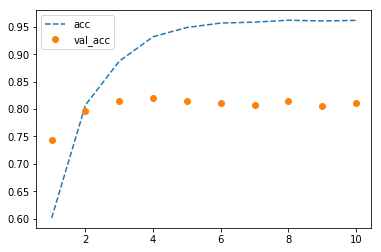

In [95]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1, 11, 1)

plt.plot(epochs, acc, '--',  label = 'acc')
plt.plot(epochs, val_acc, 'o', label = 'val_acc')
plt.legend()

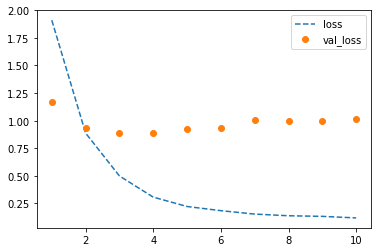

In [96]:
plt.plot(epochs, loss, '--',  label = 'loss')
plt.plot(epochs, val_loss, 'o', label = 'val_loss')
plt.legend();

In [84]:
# Naive Predictor
import copy

test_labels_copy =copy.copy(y_test)
np.random.shuffle(test_labels_copy)
equality = test_labels_copy == y_test
np.sum(equality)/y_test.shape[0]

0.18432769367764915

In [125]:
loss, acc = model.evaluate(X_train, y_train)

8982/8982 [==============================] - 3s 333us/step


[0.2607878483417132, 0.9384324203830763]

In [119]:
instance = X_test[13]
instance = np.expand_dims(instance, axis = 0)
preds = model.predict(instance)
np.argmax(preds)

3

In [124]:
all_predictions = model.predict(X_test)
print(all_predictions.shape)
np.sum(all_predictions[0])
np.argmax(all_predictions[0])

(2246, 46)


3

In [131]:
# Embedding 
from keras.preprocessing import sequence

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words= 10000)

max_length = 500
X_train = sequence.pad_sequences(X_train, max_length)
X_test = sequence.pad_sequences(X_test, max_length)

In [132]:
y_train = keras.utils.to_categorical(y_train)
x_train = keras.utils.to_categorical(y_test)

In [133]:
from keras.layers import Embedding, LSTM

model = Sequential()
model.add(Embedding(10000, 32, input_length = max_length))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(num_categories, activation = "softmax"))
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

history = model.fit(X_train, y_train,
                   epochs = 2,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/2
7185/7185 [==============================] - 351s 49ms/step - loss: 2.7941 - acc: 0.3230 - val_loss: 2.4139 - val_acc: 0.3450
Epoch 2/2
7185/7185 [==============================] - 419s 58ms/step - loss: 2.4120 - acc: 0.3534 - val_loss: 2.4075 - val_acc: 0.3450


### Boston Housing Price Prediction

In [135]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

57344/57026 [==============================] - 0s 5us/step
(404, 13)
(404,)
(102, 13)


In [140]:
import pandas as pd
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [144]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [145]:
X_train = X_train.values

In [153]:
# feature-wise normalization
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
X_train -= mean
X_train /= std

In [155]:
model = Sequential()
model.add(Dense(64, input_shape = X_train.shape[1:], activation ="relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam",
             loss = "mse",
             metrics = ["mae"])
model.fit(X_train, y_train,
         epochs = 100, batch_size = 1,
         verbose = 0)

In [156]:
X_test -= mean
X_test /= std

test_mse,test_mae = model.evaluate(X_test, y_test)
print(test_mse, test_mae)

102/102 [==============================] - 2s 21ms/step
11.025326448328356 2.279416561126709


In [157]:
def build_model():
    
    model = Sequential()
    model.add(Dense(64, input_shape = X_train.shape[1:], activation = "relu"))
    model.add(Dense(32,activation = "relu"))
    model.add(Dense(1))
    
    return model

In [175]:
# K-fold Cross Validation
k = 3
val_size = len(X_train) // k

scores = []
for i in range(k):
    
    val_data = X_train[i * val_size : (i+1) * val_size]
    val_labels = y_train[i * val_size : (i+1) * val_size]
    train_data = np.concatenate([X_train[:i * val_size], X_train[(i+1) * val_size:]], axis = 0)
    train_labels = np.concatenate([y_train[:i * val_size], y_train[(i+1) * val_size:]], axis = 0)
    
    model = build_model()
    model.compile(optimizer = "adam", loss = "mse", metrics = ['mae'])
    model.fit(train_data, train_labels, epochs = 10, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_labels)
    scores.append(val_mae)

134/134 [==============================] - 2s 17ms/step


In [177]:
scores
print(np.mean(scores))

2.6237609730431095


In [179]:
# Saving the validation logs at each epoch

all_mae_histories = []
for i in range(k):
    
    val_data = X_train[i * val_size : (i+1) * val_size]
    val_labels = y_train[i * val_size : (i+1) * val_size]
    train_data = np.concatenate([X_train[:i * val_size], X_train[(i+1) * val_size:]], axis = 0)
    train_labels = np.concatenate([y_train[:i * val_size], y_train[(i+1) * val_size:]], axis = 0)
    
    model = build_model()
    model.compile(optimizer = "adam", loss = "mse", metrics = ['mae'])
    history = model.fit(train_data, train_labels, epochs = 100, batch_size = 1, verbose = 0,
                       validation_data = (val_data, val_labels))
    
    val_mae = history.history["val_mean_absolute_error"]
    all_mae_histories.append(val_mae)
    


In [200]:
mean_mae = np.mean(all_mae_histories, axis = 0)

In [202]:
len(mean_mae)

100

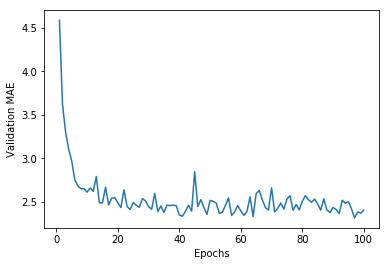

In [205]:
plt.plot(np.arange(1, 101, 1), mean_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE");

In [206]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smoothed_mae = smooth_curve(mean_mae[10:])

In [209]:
len(smoothed_mae)

90

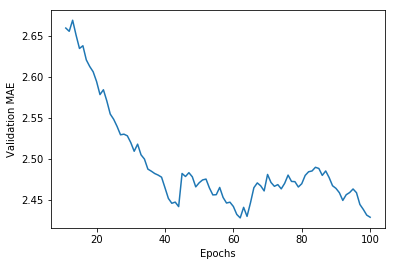

In [216]:
plt.plot(np.arange(11, 100 + 1, 1), smoothed_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE");